Performance Plots
https://calmcode.io/shorts/perfplot.html



Measure Slow Code
https://calmcode.io/pyinstrument/introduction.html






$ `pip install perfplot ipywidgets`

## Perfplot Demo


Output()

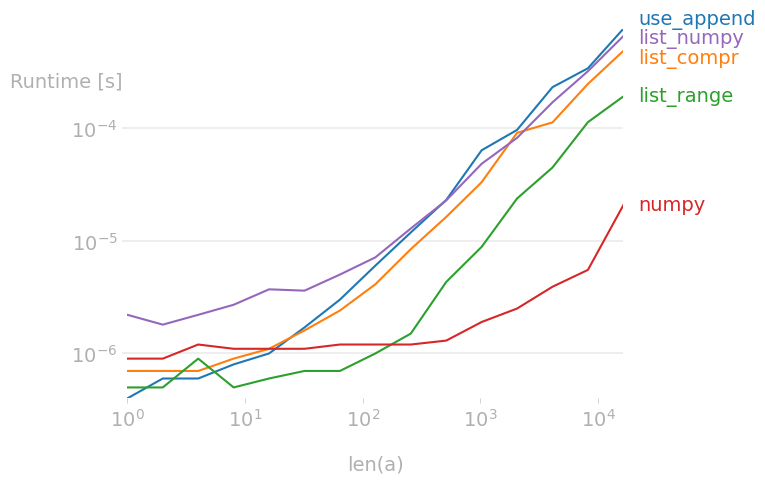

In [1]:
import perfplot
import numpy as np

%matplotlib inline


def use_append(size):
    out = []
    for i in range(size):
        out.append(i)
    return out

def list_compr(size):
    return [i for i in range(size)]

def list_range(size):
    return list(range(size))

perfplot.show(
    setup=lambda n: n,
    kernels=[
        use_append,
        list_compr,
        list_range,
        np.arange,
        lambda n: list(np.arange(n))
    ],
    labels=["use_append", "list_compr", "list_range", "numpy", "list_numpy"],
    n_range=[2**k for k in range(15)],
    xlabel="len(a)",
    equality_check=None
)

## Perfplot Advanced Demo


Output()

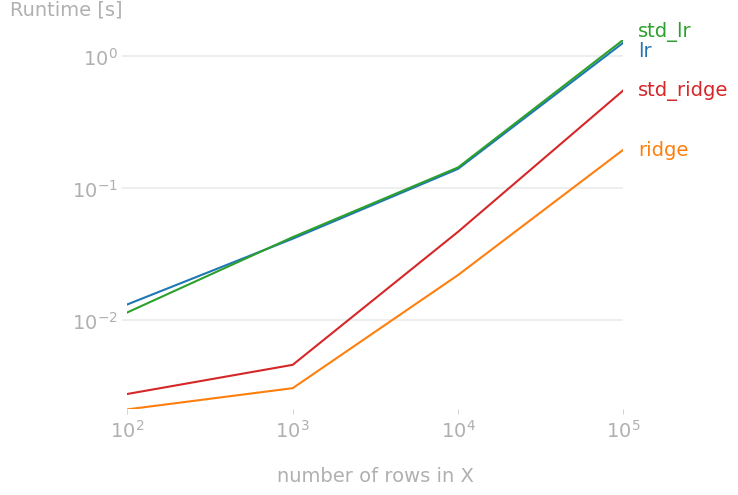

In [2]:
import perfplot

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge

def generate_data(n):
    # Add a random seed, the video forgot to do this
    X, y = make_regression(n_samples=n)
    return [X, y]

perfplot.show(
    setup=lambda n: generate_data(n),
    kernels=[
        lambda data: LinearRegression().fit(data[0], data[1]),
        lambda data: Ridge().fit(data[0], data[1]),
        lambda data: make_pipeline(StandardScaler(), LinearRegression()).fit(data[0], data[1]),
        lambda data: make_pipeline(StandardScaler(), Ridge()).fit(data[0], data[1]),
    ],
    labels=["lr", "ridge", "std_lr", "std_ridge"],
    n_range=[10**k for k in range(2, 6)],
    xlabel="number of rows in X",
    equality_check=None,
    show_progress=True,
)

## pyinstrument
https://pyinstrument.readthedocs.io/en/latest/guide.html

https://coderzcolumn.com/tutorials/python/pyinstrument-statistical-profiler-for-python-code

### Installation
$ `pip install pyinstrument`

### Run
$ `pyinstrument folder/script.py`

### Usage 
$ `pyinstrument [options] scriptfile [arg] ...`


In [ ]:
""" Options:
  --version             show program's version number and exit
  -h, --help            show this help message and exit
  --load-prev=ID        instead of running a script, load a previous report
  -m MODULE_NAME        run library module as a script, like 'python -m
                        module'
  --from-path           (POSIX only) instead of the working directory, look
                        for scriptfile in the PATH environment variable
  -o OUTFILE,  --outfile=OUTFILE save to <outfile>
  -r RENDERER, --renderer=RENDERER
                        how the report should be rendered. One of: 'text',
                        'html', 'json', 'speedscope', or python import path
                        to a renderer class
  -t, --timeline        render as a timeline - preserve ordering and don't
                        condense repeated calls
  --hide=EXPR           glob-style pattern matching the file paths whose
                        frames to hide. Defaults to '*/lib/*'.
  --hide-regex=REGEX    regex matching the file paths whose frames to hide.
                        Useful if --hide doesn't give enough control.
  --show=EXPR           glob-style pattern matching the file paths whose
                        frames to show, regardless of --hide or --hide-regex.
                        For example, use --show '*/<library>/*' to show frames
                        within a library that would otherwise be hidden.
  --show-regex=REGEX    regex matching the file paths whose frames to always
                        show. Useful if --show doesn't give enough control.
  --show-all            show everything
  --unicode             (text renderer only) force unicode text output
  --no-unicode          (text renderer only) force ascii text output
  --color               (text renderer only) force ansi color text output
  --no-color            (text renderer only) force no color text output
"""

In [13]:
import pyinstrument

!pyinstrument --color "C:/Users/Vadim/Documents/GitHub/Python/_Lessons_/MEFATHIM/Sylllabus-AdvancedPython/week4/exercises/pyinstrument_ex1.py"


  _     ._   __/__   _ _  _  _ _/_   Recorded: 14:46:11  Samples:  18638
 /_//_/// /_\ / //_// / //_'/ //     Duration: 18.904    CPU time: 8.984
/   _/                      v4.4.0

Program: C:/Users/Vadim/Documents/GitHub/Python/_Lessons_/MEFATHIM/Sylllabus-AdvancedPython/week4/exercises/pyinstrument_ex1.py

18.898 <module>  pyinstrument_ex1.py:1
└─ 18.898 get_sum_of_list  pyinstrument_ex1.py:15
   ├─ 14.954 Random.randint  random.py:358
   │  ├─ 12.662 Random.randrange  random.py:284
   │  │  ├─ 6.417 [self]  None
   │  │  ├─ 4.943 Random._randbelow_with_getrandbits  random.py:235
   │  │  │  ├─ 3.852 [self]  None
   │  │  │  ├─ 0.688 Random.getrandbits  None
   │  │  │  │     [2 frames hidden]  <built-in>
   │  │  │  └─ 0.403 int.bit_length  None
   │  │  │        [2 frames hidden]  <built-in>
   │  │  └─ 1.302 index  None
   │  │        [2 frames hidden]  <built-in>
   │  └─ 2.292 [self]  None
   ├─ 3.283 [self]  None
   ├─ 0.378 add  pyinstrument_ex1.py:11
   └─ 0.284 list.append

## Profile code in Jupyter/IPython

In [3]:
import random
from pyinstrument import Profiler

def add(a, b):
    return a + b

def get_sum_of_list():
    final_list = []
    for i in range(1_000_000):
        rand1 = random.randint(1, 100)
        rand2 = random.randint(1, 100)
        out = add(rand1, rand2)
        final_list.append(out)
    return final_list


profiler = Profiler()
profiler.start()
# enter you code here
l = get_sum_of_list()
profiler.stop()

profiler.print(color=True)
profiler.open_in_browser()
# profiler.output_html()

#Protip: To explore the profile in a web browser, use profiler.open_in_browser(). 
# To save this HTML for later, use profiler.output_html().


  _     ._   __/__   _ _  _  _ _/_   Recorded: 15:00:39  Samples:  19733
 /_//_/// /_\ / //_// / //_'/ //     Duration: 19.979    CPU time: 11.281
/   _/                      v4.4.0

Program: C:\Users\Vadim\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py --ip=127.0.0.1 --stdin=9008 --control=9006 --hb=9005 --Session.signature_scheme="hmac-sha256" --Session.key=b"b5092b87-b5e2-4b55-a6d3-d882dfc9d7c1" --shell=9007 --transport="tcp" --iopub=9009 --f=c:\Users\Vadim\AppData\Roaming\jupyter\runtime\kernel-v2-140844K7fijSBovsgO.json

19.978 <module>  ..\..\..\..\Local\Temp\ipykernel_145880\591734841.py:1
└─ 19.973 get_sum_of_list  ..\..\..\..\Local\Temp\ipykernel_145880\591734841.py:7
   ├─ 15.637 Random.randint  random.py:358
   │  ├─ 13.115 Random.randrange  random.py:284
   │  │  ├─ 6.710 [self]  None
   │  │  ├─ 5.083 Random._randbelow_with_getrandbits  random.py:235
   │  │  │  ├─ 3.958 [self]  None
   │  │  │  ├─ 0.671 Random.getrandbits  None
   │  │  │  │     [2 

In [2]:
help(profiler.print)

Help on method print in module pyinstrument.profiler:

print(file: 'IO[str]' = <ipykernel.iostream.OutStream object at 0x000001BD227B6AD0>, *, unicode: 'bool | None' = None, color: 'bool | None' = None, show_all: 'bool' = False, timeline: 'bool' = False) method of pyinstrument.profiler.Profiler instance
    print(file=sys.stdout, *, unicode=None, color=None, show_all=False, timeline=False)
    
    Print the captured profile to the console.
    
    :param file: the IO stream to write to. Could be a file descriptor or sys.stdout, sys.stderr. Defaults to sys.stdout.
    :param unicode: Override unicode support detection.
    :param color: Override ANSI color support detection.
    :param show_all: Sets the ``show_all`` parameter on the renderer.
    :param timeline: Sets the ``timeline`` parameter on the renderer.

